In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhcb_data = pd.read_csv('Data/popularity-728days.csv')
lhcb_data.irow(range(0,3))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,CALIBRATION.DST,1,104607,355,1.370105,355,1.370105,...,0,0,0,474,708,708,708,708,708,708


In [3]:
from datapop.LHCb import DataPreprocessor
data1 = DataPreprocessor(data=lhcb_data).get_preprocessed_data()
data1.irow(range(0,3))

,ID,DiskSize,Creation,First,StartTime,Now,1,2,3,4,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.635799,104591,104670,104660,104764,0,0,0,0,...,0,0,0,0,0,0,0,0,0,134
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.819260,104607,104676,104660,104764,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,104607,104666,104660,104764,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cols1 = [str(i) for i in range(27, 53)]
data = data1[data1[cols1].sum(axis=1)!=0]
data.shape
data = data1
data.shape

(10368, 110)

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.neural_network import BernoulliRBM

In [9]:

ind_train, ind_test, _,_= train_test_split(range(0, X_train.shape[0]), Y_train, \
                                                                            test_size=0.33, random_state=42)

In [10]:
x1 = data[[str(i) for i in range(1, 53)]]
x11 = data[[str(i) for i in range(1, 53)]+['DiskSize', 'Creation', 'First']]
X_train = ((x11[x1.sum(axis=1)!=0]).astype(np.float).values>0)*1.
#std = StandardScaler().fit(X_train)
#X_train = std.transform(X_train)
#X_train = BernoulliRBM(n_components=52, batch_size=10, n_iter=10, learning_rate=0.1).fit_transform(X_train)
Y_train = (((data[[str(i) for i in range(60, 67)]])[x1.sum(axis=1)!=0].sum(axis=1)>0)*1).astype(np.float).values
X_train.shape

from sklearn.cross_validation import train_test_split
X_train_train, X_train_test, Y_train_train, Y_train_test = train_test_split(X_train, Y_train, \
                                                                            test_size=0.33, random_state=42)
X_train.shape

(3323, 55)

In [11]:
x2 = data[[str(i) for i in range(2, 54)]]
x22 = data[[str(i) for i in range(2, 54)]+['DiskSize', 'Creation', 'First']]
X_test = ((x22[x1.sum(axis=1)!=0]).astype(np.float).values>0)*1.
#std = StandardScaler().fit(X_test)
#X_test = std.transform(X_test)
#X_test = BernoulliRBM(n_components=52, n_iter=10).fit_transform(X_test)
Y_test = (((data[[str(i) for i in range(60, 67)]])[x1.sum(axis=1)!=0].sum(axis=1)>0)*1).astype(np.float).values
X_test.shape

(3323, 55)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from nolearn.dbn import DBN

In [124]:
gbc = GradientBoostingClassifier(learning_rate=0.02, n_estimators=2500, max_depth=6, subsample=0.8)
#gbc = KNeighborsClassifier(n_neighbors=100, p=1, weights='distance', leaf_size=100)
#gbc = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02)
#gbc = DBN([-1, 100, -1], epochs=10, learn_rates=0.2)
gbc.fit(X_train[ind_train,:], Y_train[ind_train])

GradientBoostingClassifier(init=None, learning_rate=0.02, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=2500,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [125]:
proba_train = gbc.predict_proba(X_train[ind_test, :])[:,1]
proba_test = gbc.predict_proba(X_test[ind_test, :])[:,1]

In [126]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_train[ind_test],\
                        proba_train)
roc_auc = auc(fpr, tpr)
roc_auc

0.85279966694135434

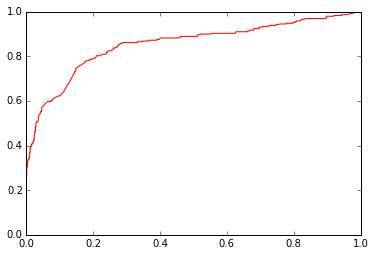

In [127]:
plt.plot(fpr, tpr)

In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test[ind_test],\
                        proba_test)
roc_auc = auc(fpr, tpr)
roc_auc

0.70776464427963193

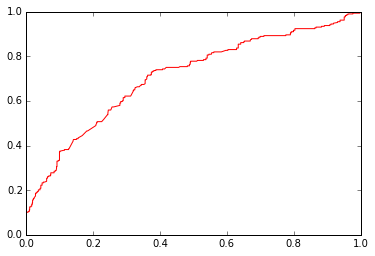

In [129]:
plt.plot(fpr, tpr)

In [ ]:
#http://hmmlearn.github.io/hmmlearn/index.html
#http://scikit-learn.org/stable/modules/hmm.html

Automatically created module for IPython interactive environment
fitting to HMM and decoding ...done

Transition matrix
[[ 0.63319103  0.23044593  0.13636304]
 [ 0.0563035   0.90306577  0.04063073]
 [ 0.04729452  0.0302745   0.92243098]]
means and vars of each hidden state
0th hidden state
mean =  [ -5.01809255e-02   1.01560327e+08]
var =  [  1.74338044e+00   3.32698834e+15]

1th hidden state
mean =  [  1.62343825e-02   7.26688891e+07]
var =  [  7.34164558e-02   3.97749382e+14]

2th hidden state
mean =  [  8.40069423e-03   4.89782638e+07]
var =  [  1.96554925e-01   1.52064952e+14]



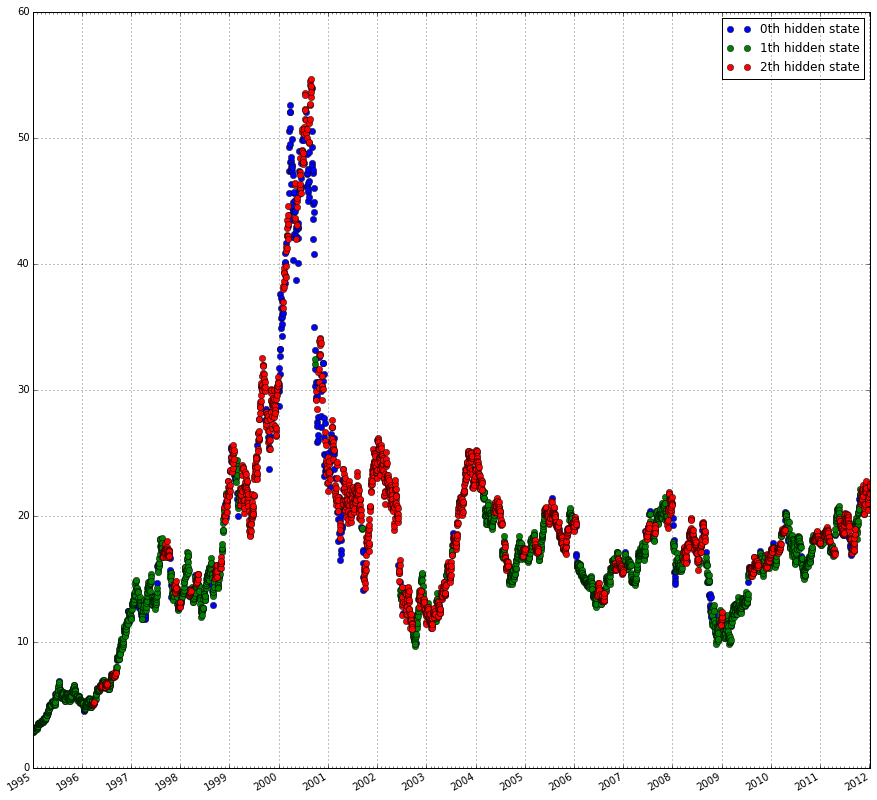

In [8]:
from __future__ import print_function
%matplotlib inline
import datetime
import numpy as np
import pylab as pl
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from hmmlearn.hmm import GaussianHMM


print(__doc__)

###############################################################################
# Downloading the data
date1 = datetime.date(1995, 1, 1)  # start date
date2 = datetime.date(2012, 1, 6)  # end date
# get quotes from yahoo finance
quotes = quotes_historical_yahoo_ochl("INTC", date1, date2)
if len(quotes) == 0:
    raise SystemExit

# unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# take diff of close value
# this makes len(diff) = len(close_t) - 1
# therefore, others quantity also need to be shifted
diff = close_v[1:] - close_v[:-1]
dates = dates[1:]
close_v = close_v[1:]

# pack diff and volume for training
X = np.column_stack([diff, volume])

###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end='')
n_components = 3

# make an HMM instance and execute fit
model = GaussianHMM(n_components, covariance_type="diag", n_iter=100)

model.fit([X])

# predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done\n")

###############################################################################
# print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
# print()

print("means and vars of each hidden state")
for i in range(n_components):
    print("%dth hidden state" % i)
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(111)

for i in range(n_components):
    # use fancy indexing to plot data in each state
    idx = (hidden_states == i)
    ax.plot_date(dates[idx], close_v[idx], 'o', label="%dth hidden state" % i)
ax.legend()

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

# format the coords message box
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
ax.fmt_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()
#pl.show()

In [ ]:
#pl.show()

In [3]:
X.shape

(4285, 2)